La conflictividad laboral es un fenómeno social complejo, resultado de acciones contenciosas colectivas que buscan alcanzar demandas laborales. En el sector de mensajería urbana y delivery de alimentos, esta conflictividad emergió hacia fines del siglo XX, cuando en 1999 una serie de movilizaciones espontáneas reclamaron justicia por los motoqueros fallecidos en accidentes de tránsito. De ese proceso nació el Sindicato Independiente de Mensajeros y Cadetes (SIMeCa), que encabezó luchas por derechos básicos como la circulación en el microcentro, la reducción del precio de los peajes y, de modo central, el reconocimiento laboral del sector. Una década después, la Asociación Sindical de Mensajeros y Motoqueros (ASIMM), apoyada por la CGT y sectores peronistas, obtuvo el reconocimiento e la personería gremial y firmó el primer convenio colectivo de la actividad, extendiendo la cobertura sindical a más de tres mil trabajadores asalariados. Este proceso de regulación alcanzó un punto singular con la entrada de la plataforma Pedidos Ya, que registró a sus repartidores bajo el convenio de ASIMM, hecho excepcional en el mundo de las plataformas de trabajo. Sin embargo, en 2019 la empresa despidió a 430 trabajadores y adoptó, al igual que Rappi, Glovo y UberEats, un esquema de contratación en régimen de “autónomia”. De este modo, el ciclo de expansión del empleo asalariado dio lugar a un nuevo escenario de precarización.
En este contexto, el interrogante que buscamos responder es el siguiente: ¿A partir de la expansión de las plataformas de reparto, la conflictividad crece o, por el contrario, experimenta un retroceso? A su vez, nos preguntamos, ¿las demandas de los trabajadores, las acciones contenciosas que llevan a cabo y el tipo de organización que construyen colectivamente son similares que las del periodo previo o se modifican?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comenzamos cargando la base de datos
df_base_conflicto = pd.read_excel("/content/BASE 2006-2023_conplataformas (1).xlsx")

# Analizamos la información principal de la base
df_base_conflicto.info()
# Observamos que tiene una singularidad dada porque no es muy extensa en el número de casos
# (154 entradas), pero posee una gran cantidad de variables (119 columnas).
# Esto nos lleva a preguntarnos por las variables más importantes para nuestro analisis y
# cuales debemos deshechar para reducir costos computacionales y evitar multicolinealidad.
# Continuamos analizando el tipo de datos que predomina en la base:
df_base_conflicto.describe()
# El tipo de datos predominante es números enteros "Int64", seguido por números flotantes (23)
# y objetos (16). Esto se debe a que la mayoría de ellos son códigos dnúmericos de categorias que agrupan
# los conflictos según tipo de demanda, tipo de organización y tipo de acción conflictiva.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Columns: 120 entries, Conf_N to A_Obser
dtypes: float64(23), int64(81), object(16)
memory usage: 145.4+ KB


,Conf_N,CONTROL,Observaciones,Muletos,CAnt_N,CAnt_C,CAnt_Acu,Mes,Trim,Sem,...,A_Decla,A_AnunSP,A_AnunPa,A_Concen,A_Movil,A_Quite,A_Cortes,A_Bloque,A_Ocupa,A_Obser
count,155.000000,21.000000,1.0,155.000000,155.000000,155.000000,155.0,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.0,155.000000,155.000000,155.000000,1.0
mean,40886.019355,0.714286,2.0,0.116129,6809.748387,0.612903,0.0,6.722581,2.561290,1.529032,...,0.070968,0.038710,0.032258,0.496774,0.425806,0.0,0.161290,0.006452,0.025806,0.0
std,13521.505956,1.189237,NaN,0.394027,15923.687488,2.228467,0.0,3.252443,1.069554,0.500774,...,0.257603,0.193527,0.177257,0.526865,0.720285,0.0,0.402651,0.080322,0.159071,NaN
min,694.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,38939.500000,0.000000,2.0,0.000000,0.000000,0.000000,0.0,4.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,46108.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.0,7.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,48904.500000,2.000000,2.0,0.000000,0.000000,0.000000,0.0,9.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0
max,55001.000000,3.000000,2.0,2.000000,51693.000000,9.000000,0.0,12.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,4.000000,0.0,2.000000,1.000000,1.000000,0.0


In [14]:
# Comenzamos limpiando la base. En primer lugar hacemos una revisión cualitativa en la columna
# "trabajadores" para observar si son motoqueros, mensajeros, deliverys o, por el contrario,
# corresponden a otros gremios que no analizamos, como "camioneros". En este caso, detectamos
# 9 casos que no corresponde a nuestro universo de estudio. Hacemos una lista con estos casos.
df_base_conflicto["Trabajadores"].value_counts(dropna=False)
df_base_conflicto["Trabajadores"].value_counts(dropna=False).to_string()


casos_a_eliminar = [
    6613, 7789, 8554, 13425, 28099,
    44832, 50275, 53431, 54763
]
#y luego quitamos dicha lista de la base:
df_base_conflicto = df_base_conflicto[
    ~df_base_conflicto["Conf_N"].isin(casos_a_eliminar)
]
#corroboramos que fueron eliminados y reseteamos el index
df_base_conflicto.info()
df_base_conflicto = df_base_conflicto.reset_index(drop=True)

# una vez eliminadas las filas erroneas, vamos a eliminar columnas redundantes.
# Primero, observamos el nombre de las columnas
df_base_conflicto.columns
# dado que no podemos ver todos usamos un for para mejorar la visualización
for col in df_base_conflicto.columns:
    print(col)
# procesdemos a eliminar columnas redundantes para nuestro analisis como las que son de control,
# describen el lugar de conflicto, dan información detallada de la fecha del conflicto (semana, trimestre)
# son columnas de resumen o acumulación de casos.

# Generamos una tabla con las columnas a eliminar
columnas_a_eliminar = [
    "CONTROL",
    "Observaciones",
    "S_Observaciones",
    "Muletos",
    "Mes",
    "Trim",
    "Sem",
    "IFuente",
    "AgreEcon",
    "AgreTerr",
    "AgreResu",
    "Agreres2",
    "otros1",
    "otros2",
    "H_MesPrN",
    "H_MesPrC",
    "H_MesNaN",
    "H_MesNaC",
    "H_MesAgN",
    "H_MesAgC",
    "H_TriPrN",
    "H_TriPrC",
    "H_TriNaN",
    "H_TriNaC",
    "H_TriAgN",
    "H_TriAgC",
    "H_SemPrN",
    "H_SemPrC",
    "H_SemNaN",
    "H_SemNaC",
    "H_SemAGN",
    "H_SemAGC",
    "H_AnuPrN",
    "H_AnuPrC",
    "H_AnuNaN",
    "H_AnuNaC",
    "H_AnuAgN",
    "H_AnuAgC",
    "AmbAcu",
    "ConfTACU",
    "AccTAcu",
    "HuelAcu",
    "JintAcu",
    "JorAcu"
]

## eliminamos estas columnas
df_base_conflicto_limpia = df_base_conflicto.drop(
    columns=columnas_a_eliminar,
    errors="ignore"
)
## Observamos que la base se redujo a 75 columnas
df_base_conflicto_limpia.shape



<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 154
Columns: 120 entries, Conf_N to A_Obser
dtypes: float64(23), int64(81), object(16)
memory usage: 138.0+ KB
Conf_N
CONTROL
Observaciones
S_Observaciones
Muletos
CAnt_N
CAnt_C
CAnt_Acu
Mes
Trim
Sem
AÑO
Implic
IFuente
Imp Obs
Huelg
Trabajadores
Sindicato
Plataformas
S_N Legajo
S_Cod1
tipoorga
tipoorg2
AMBITO
ACT ECON
AE2
CATEGORI
NIV ESTA
AgreEcon
AgreTerr
AgreResu
Agreres2
lugar trabajo
LOC GEO
Respons
Interven
reclamos 1
reclamos 2
reclamos 3
recl Obs
RECLAMOS
ReclTipo
Rec1
Rec2
Rec3
Rec4
ReclOrie
Rec1B
accix
Rec1resu
Rec1res2
AccTipo
AccTipoB
accix 2
accipred
ConfTipo
Jor Paro
JINTMes
AmbTrim
ConfTTri
JINTTrim
AmbSem
ConfTSem
HuelSem
JINTSeme
JorSem
AmbAnu
AccTAnu
ConfTAnu
H_Anual
JPAnual
JTPAnual
acciones1
acciones2
acciones3
acciones4
acciones5
otros1
otros2
H_MesPrN
H_MesPrC
H_MesNaN
H_MesNaC
H_MesAgN
H_MesAgC
H_TriPrN
H_TriPrC
H_TriNaN
H_TriNaC
H_TriAgN
H_TriAgC
H_SemPrN
H_SemPrC
H_SemNaN
H_SemNaC
H_SemAGN
H_SemAGC


(146, 76)

# Sección nueva

# Sección nueva

In [15]:


# Ahora, utilizamos métodos "feature selection" con el objetivo de seguir reduciendo la dimensión de la base
# En primer lugar, eliminaremos las columnas de baja variabilidad
## comenzamos observando si hay columnas con una alta dominancia de casos
dominancia = (
    df_base_conflicto_limpia
    .apply(lambda x: x.value_counts(normalize=True, dropna=False).iloc[0])
)

## Observamos en detalle las columnas en donde la dominancia es mayor al 95% de casos

cols_baja_var = dominancia[dominancia > 0.95].index
len(cols_baja_var)

## se trata de 25 columnas que tienen mayormente datos en 0 o equivalentes. Las anulamos:

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=cols_baja_var)

## repetimos para ver las columnas con un 90% de dominancia

dominancia2 = (
    df_base_conflicto_limpia
    .apply(lambda x: x.value_counts(normalize=True, dropna=False).iloc[0])
)
#
cols_baja_var2 = dominancia2[dominancia2 > 0.90].index
len(cols_baja_var2)

# se trata de 5 columnas 8 columnas redundantes y las eliminamos

columnas_a_eliminar2 = ['CAnt_C', 'Interven', 'Rec4', 'Rec1B', 'Rec1res2', 'acciones4',
       'acciones5', 'A_Decla']
#
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(
    columns=columnas_a_eliminar2,
    errors="ignore"
)

# reducimos la base a 43 columnas.
df_base_conflicto_limpia.shape

# con una base reducida, volvemos a inspeccionar manualmente columnas redundantes.
# Eliminamos columnas descriptivas y de resumen que no son utiles para el analisis.

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Conf_N"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Implic"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["lugar trabajo"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["CATEGORI"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Respons"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["reclamos 2"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["reclamos 3"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Rec3"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Trabajadores"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Sindicato"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["reclamos 1"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["JINTMes"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AmbTrim"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["ConfTTri"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["JINTTrim"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["ConfTSem"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AmbAnu"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AccTAnu"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["ConfTAnu"])

## Así, reducimos las dimensiones a 23 columnas.
df_base_conflicto_limpia.shape

##Una vez hecha esta limpieza guardamos la base de datos

df_base_conflicto_limpia.to_csv(
    "base_conflicto_2006_2023_limpia.csv",
    index=False,
    encoding="utf-8"
)
# y la descargamos para utilizarla en otras ocasiones.
#from google.colab import files
#files.download("base_conflicto_2006_2023_limpia.csv")


df_base_conflicto_limpia



,CAnt_N,AÑO,Huelg,Plataformas,S_Cod1,tipoorga,LOC GEO,ReclTipo,Rec1,Rec2,...,Jor Paro,AmbSem,JTPAnual,acciones1,acciones2,acciones3,A_Paros,A_Concen,A_Movil,A_Cortes
0,0,2006,0.0,0,496,2,3,2,5,0,...,0.00,2,NaN,acto de protesta frente a farmacia-laboratorio...,NaN,NaN,0,1,0,0
1,0,2006,0.0,0,789,2,11,2,5,0,...,0.00,2,0.0,El martes 17/10 realizarán una asamblea para d...,NaN,NaN,0,0,0,0
2,0,2006,0.0,0,496,2,27,2,7,0,...,0.00,2,0.0,"12-07, se movilizan al Ministerio de Trabajo",NaN,NaN,0,0,1,0
3,0,2008,0.0,0,496,2,3,2,7,9,...,0.00,2,0.0,"06-26, realizan una marcha desde el Obelisco h...",NaN,NaN,0,0,1,0
4,0,2009,0.0,0,502,2,25,2,6,0,...,0.00,2,0.0,08-25 Realizan una protesta en Plaza Independe...,NaN,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,2023,0.0,0,1,2,23,2,11,0,...,0.00,0,0.0,\n02-15 se movilizaron en Gobernación,0,0,0,0,1,0
142,0,2023,0.0,0,1,2,25,2,11,0,...,0.00,0,0.0,03-13 se movilizaron este lunes 13 por las cal...,0,0,0,0,1,0
143,0,2023,0.0,0,1,2,23,2,11,0,...,0.00,0,0.0,03-20 realizara movilización el dia 21\n03-21 ...,NaN,NaN,0,0,0,0
144,0,2023,0.0,1,3,10,25,2,11,0,...,0.00,0,0.0,07-12 se concentran en la explanada de Casa de...,0,0,0,1,0,0


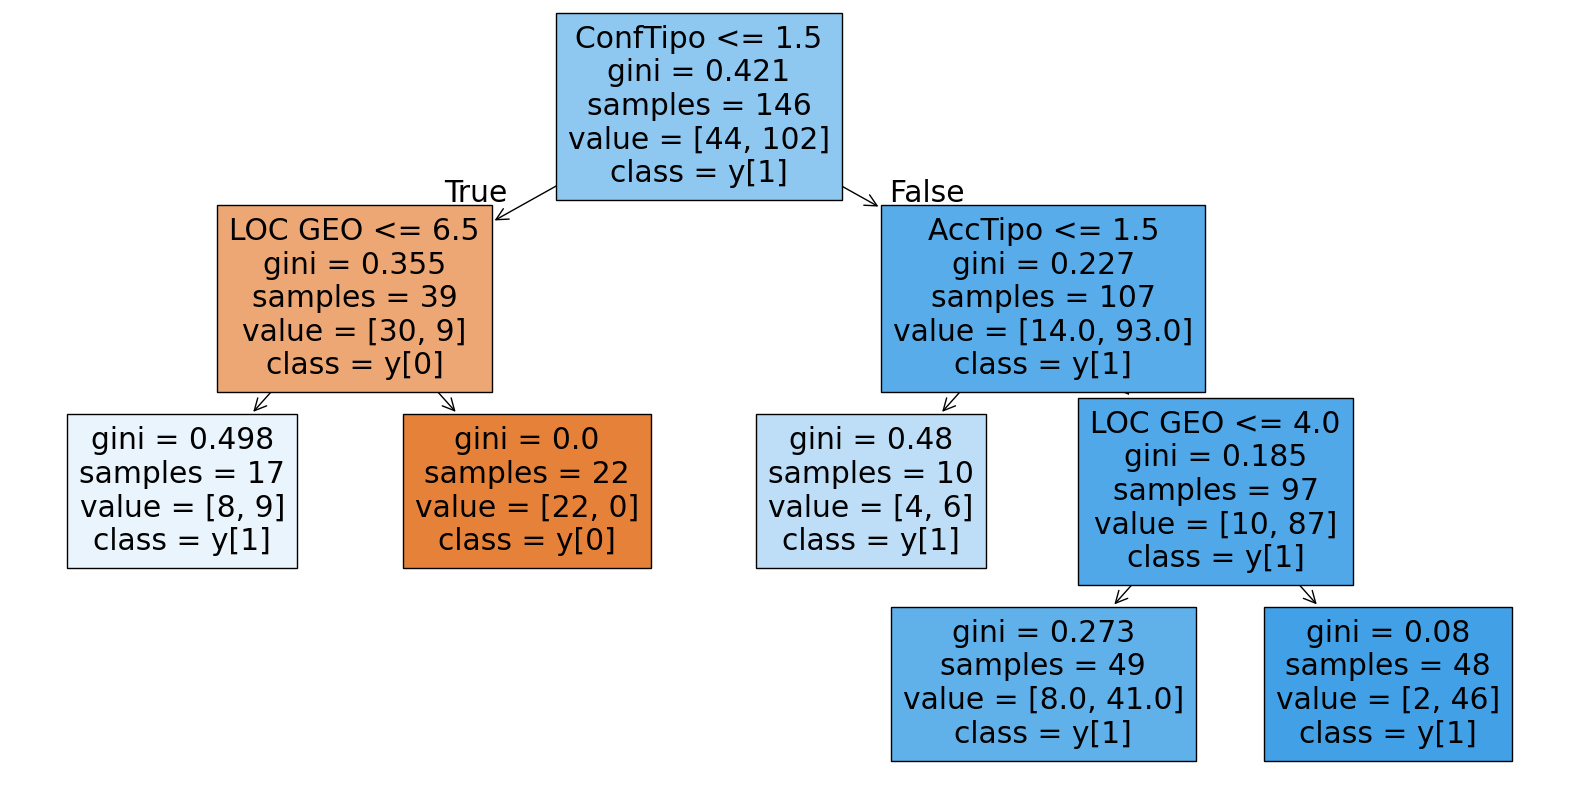

In [16]:
# una vez realizada esta primera limpieza de la base, continuamos con otros método de feature selection con el objetivo
# de conocer las columnas que tienen mayor incidencia en la explicación del conflicto.
# Para ello, entrenamos un árbol de decisión simple, con el objetivo de visualizar las principales
# variables que emplearemos posteriormente en un cluster.
# PAra ello, definimos la variación de la demanda como variable dependiente y analizamos cómo se asocian 7 variables independientes.
## Y es igual a ReclTipo (demanda salarial o no salarial)
## X es igual a AÑO, LOC GEO (Provincia), tipoorga (tipo de organización), AccTipo (huelgas, movilizaciones)
## ConfTipo (con paro o sin paro), Plataformas (si son o no trabajadores de plataformas)
df_base_conflicto_limpia

y = df_base_conflicto_limpia["ReclTipo"]

columnas_X = [
    "AÑO",
    "LOC GEO",
    "tipoorga",
    "AccTipo",
    "ConfTipo",
    "Plataformas",
    ]

X = df_base_conflicto_limpia[columnas_X]

## Verificamos que x es númerico.
X.dtypes

## una vez definidas las variables Y y X, entrenamos un arbol

from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(
    max_depth=3,        # armamos un árbol poco profundo
    min_samples_leaf=10, # evitamos sobreajuste
    random_state=42
)

arbol.fit(X, y)

## Ahora, observamos que variables usa el arbol.

importancias = pd.Series(
    arbol.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

## Al observar las importancias encontramos la siguiente información:
## el tipo de conflicto [ConfTipo] incide en un 0.75, la Loc Geo (zona) en un 0.19 y
## la acción tipo [AccTipo] en un 0.05.
# Mientras que el tipoorga, plataformas y año en 0

## Separamos las importancias = 0

importancias[importancias == 0]

## por último, visualizamos el arbol

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    arbol,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()

# Dado que el tipo de demanda fue definido como variable dependiente, el árbol de decisión permite
# identificar qué dimensiones del conflicto contribuyen a discriminar empíricamente entre distintos
# tipos de demanda. Los resultados muestran que la localización geográfica y, en menor medida,
# el tipo de acción colectiva, presentan asociaciones sistemáticas con la demanda.
# En cambio, variables como el tipo de organización, la pertenencia a plataformas y el año del conflicto
# no aportan capacidad discriminante adicional una vez consideradas estas dimensiones,
# lo que sugiere que su relación con la demanda es indirecta o mediada
# Sin embargo, consideramos que la nula asociación puede deberse a la variable dicotomica (demanda salarial y no salarial);
# por este motivo, a continuación repetimos el mismo ejercicio con demandas desagregadas





In [25]:
## ahora bien, dado que este primer analisis verso en una variable dicotomica (conflicto salarial o no salarial)
## nos proponemos repetir el analisis tomando como variable y Rec1 que engloba 12 demandas (2 salariales y 10 no salariales)

## pruebo sacando ConfTipo
y1 = df_base_conflicto_limpia["Rec1"]

columnas_X1 = [
    "AÑO",
    "LOC GEO",
    "tipoorga",
    "AccTipo",
    "ConfTipo",
    "Plataformas",
    ]

X1 = df_base_conflicto_limpia[columnas_X1]

## Verificamos que x es númerico.
X1.dtypes

## una vez definidas las variables Y y X, entrenamos un arbol

from sklearn.tree import DecisionTreeClassifier

arbol1 = DecisionTreeClassifier(
    max_depth=3,        # árbol poco profundo
    min_samples_leaf=10, # evita sobreajuste
    random_state=42
)

arbol1.fit(X1, y1)

## Ahora, observamos que variables usa el arbol.

importancias1 = pd.Series(
    arbol1.feature_importances_,
    index=X1.columns
).sort_values(ascending=False)

importancias1

## Al observar las importancias encontramos la siguiente información:
## el tipo de conflicto [ConfTipo] incide en un 0.38, el Año en 0.2, plataformas en 0.15 la Loc Geo (zona) en un 0.09 y
# el tipoorga en 0.6 y la acción tipo [AccTipo] en 0.



## Separamos las importancias = 0

importancias1[importancias1 == 0]

## por último, visualizamos el arbol

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    arbol1,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()


## Este árbol es analíticamente más rico que el anterior.
# Continua evidenciando que los tipos de demanda se asocian fuertemente con determinadas
# formas de acción colectiva, pero incorpora patrones territoriales y temporales específicos.
# Esto no es casual, ya que con la llegada de las plataformas y la pandemia la conflictividad
# tendió a incrementarse y a tener como centro la región del AMBA



,0
ConfTipo,0.398758
AÑO,0.291092
Plataformas,0.152198
LOC GEO,0.091102
tipoorga,0.066850
AccTipo,0.000000


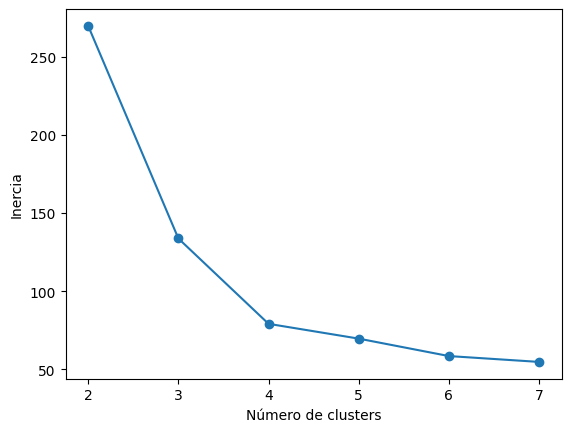


Cluster 0
Rec1
11    35
12    12
9      2
7      2
10     1
Name: count, dtype: int64
AccTipo
2    32
3    16
1     3
4     1
Name: count, dtype: int64
tipoorga
2     20
10    17
11     9
6      5
1      1
Name: count, dtype: int64

Cluster 1
Rec1
1    23
2     8
5     3
7     3
6     2
4     1
3     1
Name: count, dtype: int64
AccTipo
4    33
3     4
5     4
Name: count, dtype: int64
tipoorga
6     16
2     14
10     5
1      5
11     1
Name: count, dtype: int64

Cluster 2
Rec1
6    18
7    14
5     5
3     4
1     3
8     1
4     1
2     1
Name: count, dtype: int64
AccTipo
2    40
1     6
3     1
Name: count, dtype: int64
tipoorga
2     36
6      6
10     2
13     1
9      1
11     1
Name: count, dtype: int64

Cluster 3
Rec1
6    2
1    1
3    1
5    1
7    1
Name: count, dtype: int64
AccTipo
2    4
4    1
1    1
Name: count, dtype: int64
tipoorga
50    3
52    3
Name: count, dtype: int64


,count
cluster,
0,52
1,41
2,47
3,6


In [18]:
## Comenzamos con el analisis supervisado analizando como se agrupan los datos. Dados nuestros objetivos analiticos,
# agrupamos los datos según demanda, acción y tipo de organización, para luego contrastar como evolucionan los clauster
# en el periodo 2006-2023 y entre trabajadores de plataformas y del sector tradicional.

vars_cluster = [
    "Rec1", ## demandas salariales (1 y 3), no salariales = 2,4,5...12
    "AccTipo", ## 1 anuncios, 2 movilizaciones, 3 cortes, 4 paros, 5 bloqueos
    "tipoorga", ## 1 frentes, 2 sindicatos, 6 org sind inf, 8 agrupacion sindical, 10 trabajadores sin representacion, 11 sin dato, 13 intra tabajadores, 50 trabajadores organizados sin informacion, 52 delegados gremiales
]

X2 = df_base_conflicto_limpia[vars_cluster].copy()

X2.isna().sum()

from sklearn.preprocessing import StandardScaler


## usamos el método del codo para saber el número de clauster.
## En este caso, 4 es el más conveniente.
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X2_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

## Entrenamos el modelo

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X2_scaled)

df_base_conflicto_limpia["cluster"] = clusters

## observamos

df_base_conflicto_limpia.groupby("cluster")[vars_cluster].mean()


## distribución categorica
for c in sorted(df_base_conflicto_limpia["cluster"].unique()):
    print(f"\nCluster {c}")
    print(df_base_conflicto_limpia[df_base_conflicto_limpia["cluster"] == c]["Rec1"].value_counts())
    print(df_base_conflicto_limpia[df_base_conflicto_limpia["cluster"] == c]["AccTipo"].value_counts())
    print(df_base_conflicto_limpia[df_base_conflicto_limpia["cluster"] == c]["tipoorga"].value_counts())


## cantidad de casos por clauster:
df_base_conflicto_limpia["cluster"].value_counts().sort_index()

## lo que observamos son 3 cluster que condensan la mayoria de los casos y un clauster pequeño de 6 casos
## En el primer clauster
##Hallazgos: Cluster 0) predominan demandas de seguridad (por robos o accidentes) y otras demandas
# Estas demandas se llevan a cabo mediante movilizaciones y cortes de calle y son organizadas por sindicatos y trabajadores sin representantes
## Cluster 1) Las demandas por mejoras salariales se llevan adelante con huelgas y son organizadas por organizaciones sindicales formales o informales
## Cluster 2) El principal reclamo es la regulación del contrato laboral y las condiciones laborales, predomina la movilización y los anuncios como acción. Es protagonizada por sindicatos


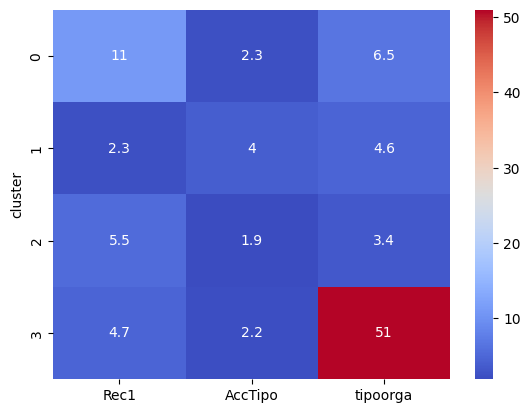

In [19]:
## visualizaciones
import seaborn as sns
## Mapa caliente del clauster ("heatmap")
perfil = df_base_conflicto_limpia.groupby("cluster")[
    ["Rec1","AccTipo","tipoorga"]
].mean()

sns.heatmap(perfil, annot=True, cmap="coolwarm")
plt.show()




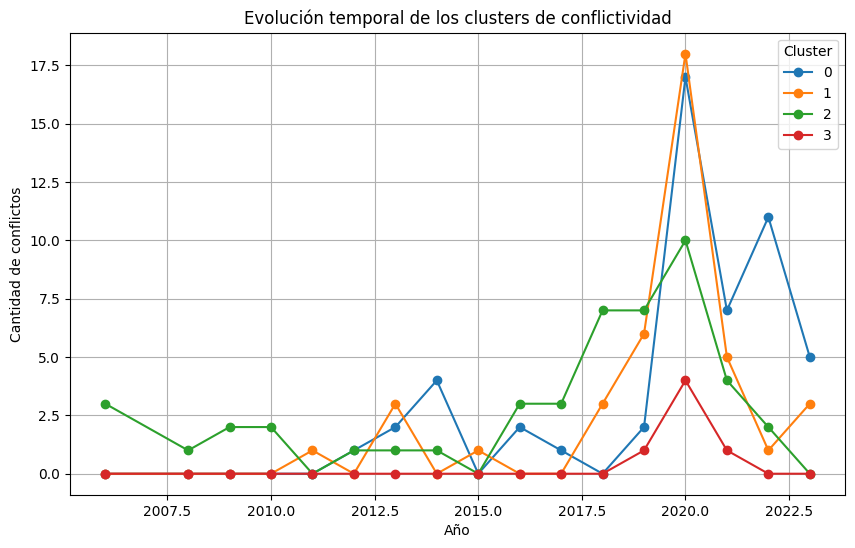

In [20]:
## clauster por tiempo evidencia que la conflictividad se incrementa en el año 2018 cuando llegan las plataforma de reparto a Argentina
pd.crosstab(df_base_conflicto_limpia["cluster"], df_base_conflicto_limpia["AÑO"])

##invierto la tabla para facilitar la lectura
tabla_tiempo = pd.crosstab(
    df_base_conflicto_limpia["AÑO"],
    df_base_conflicto_limpia["cluster"]
)
## genero gráfico para visualizar
tabla_tiempo.plot(
    kind="line",
    marker="o",
    figsize=(10,6)
)

plt.title("Evolución temporal de los clusters de conflictividad")
plt.xlabel("Año")
plt.ylabel("Cantidad de conflictos")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

## este gráfico introduce nuevas problamaticas.
## por un lado, evidencia que la conflictividad crece con la llega de las plataformas.
## por el otro, muestra que su pico se encuentra entre los años 2020 y 2021, en el contecto de pandemia
## cuando los trabajadores fueron declarados esenciales. Luego, la conflictividad cae drasticamente

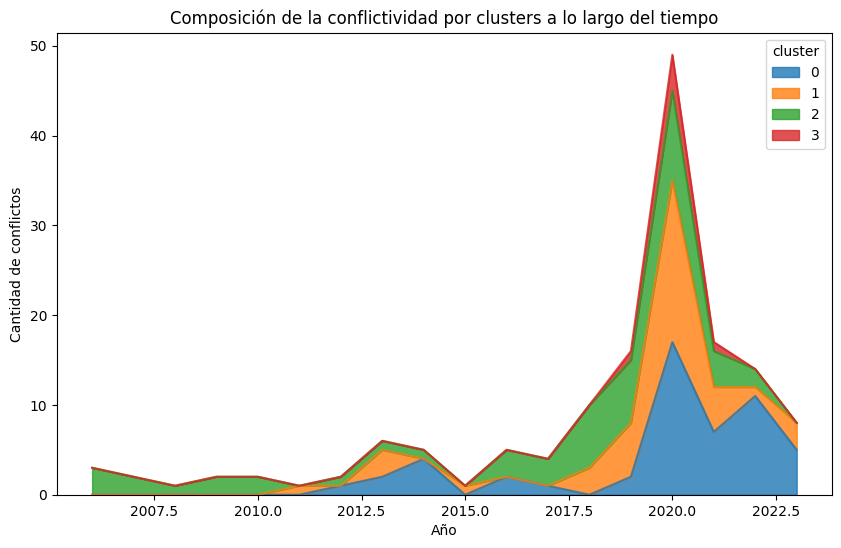

In [21]:
## otra opción para visualizar la evolución temporal de los clauster, con area rellena
tabla_tiempo.plot(
    kind="area",
    stacked=True,
    figsize=(10,6),
    alpha=0.8
)

plt.title("Composición de la conflictividad por clusters a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Cantidad de conflictos")
plt.show()

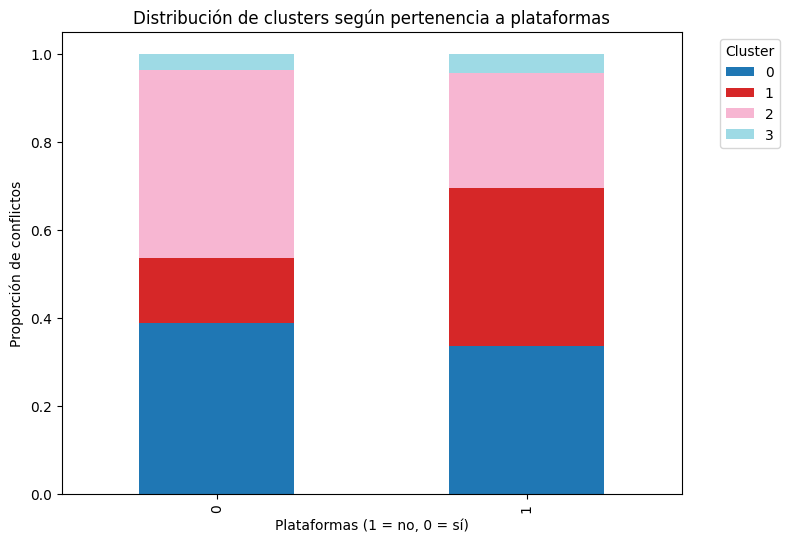

In [22]:
## ahora comparamos la conflictivad entre trabajadores de plataformas y no plataformizados
## nos interesa observar que conflictos (clauster) predominan para cada sector
tabla_plataformas = pd.crosstab(
    df_base_conflicto_limpia["Plataformas"],
    df_base_conflicto_limpia["cluster"],
    normalize="index"  # porcentajes
)

## visualización
tabla_plataformas.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    colormap="tab20"
)

plt.title("Distribución de clusters según pertenencia a plataformas")
plt.xlabel("Plataformas (1 = no, 0 = sí)")
plt.ylabel("Proporción de conflictos")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Entre los trabajadores de plataformas hay dos demandas mayoritarias: demandas de seguridad y regulación del contrato de trabajo,
# siendo pocos los conflictos vinculados a aumentos salariales.
# Por el contrario, entre los trabajadores no plataformizados las demandas salariales son las principaes, seguidos
# en términos parejos las demandas de seguridad y reconocimiento laboral de la actividad

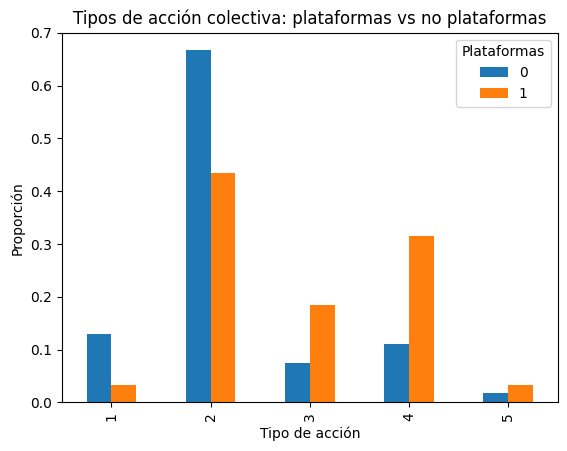

In [23]:
## ahora nos interesa ver la conflictividad especificamente bajo plataformas

df_plat = df_base_conflicto_limpia[
    df_base_conflicto_limpia["Plataformas"] == 1
]

df_no_plat = df_base_conflicto_limpia[
    df_base_conflicto_limpia["Plataformas"] == 0
]

## analizamos primero como se distribuyen (en porcentaje)
# las organizaciones que encabezan reclamos:
df_plat["tipoorga"].value_counts(normalize=True)

pd.crosstab(
    df_base_conflicto_limpia["Plataformas"],
    df_base_conflicto_limpia["tipoorga"],
    normalize="index"
)

## y por último, cómo se distribuyen las principales acciones conflctivas
pd.crosstab(
    df_base_conflicto_limpia["Plataformas"],
    df_base_conflicto_limpia["AccTipo"],
    normalize="index"
)

## Por último visualiamos:

pd.crosstab(
    df_base_conflicto_limpia["Plataformas"],
    df_base_conflicto_limpia["AccTipo"],
    normalize="index"
).T.plot(kind="bar")

plt.title("Tipos de acción colectiva: plataformas vs no plataformas")
plt.ylabel("Proporción")
plt.xlabel("Tipo de acción")
plt.show()

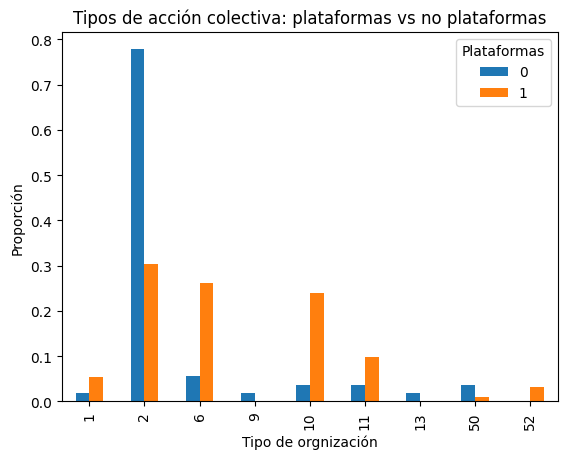

In [24]:
## y comparativo de organización

pd.crosstab(
    df_base_conflicto_limpia["Plataformas"],
    df_base_conflicto_limpia["tipoorga"],
    normalize="index"
).T.plot(kind="bar")

plt.title("Tipos de acción colectiva: plataformas vs no plataformas")
plt.ylabel("Proporción")
plt.xlabel("Tipo de orgnización")
plt.show()